## Project: Predicting Ethereum's price with Long Short-Term Memory (LSTM) Recurrent Neural Networks 


-  Nhan (Jimmy) Nguyen
- Data Scholar Pathways



## About Recurrent Neural Networks (RNN) : 

- Its a powerful type of neural network designed to handle sequence dependence
- Basicially they are networks with loops in them, allowing information to persist 


![](rnn.png)




----
## About LSTMs


- LTSM Network is a type of recurrent neural network used in deep learning because very large architectures can be successfully trained.
- They're very popular for working with sequential data such as texts, time series data etc.

- **Learn more about it here:**  http://colah.github.io/posts/2015-08-Understanding-LSTMs/

----
## Why use RNN?

- Time Series prediction are a difficult type of predictive modeling problem.
- Unlike regression predictive modeling, time series data adds complexity of a sequence dependence among the input variables 
---
## Goal: 

1) I will learn how to a develope LSTM network using Keras deep learning library to address a demonstration of time-series prediction problem



-----

## Disclaimer: 

- There many other factors that affect cryptocurrency prices and this project is purely for educational purposes and nothing more.


----

## About my dataset:

- I want to predict the Ethereum price 
- My data consist of Ethereum data from Jan 2016-April 2018

Source: https://coinmarketcap.com/currencies/ethereum/historical-data/

## Why?

- Because I'm tired of hearing about bitcoin

----

## Packages 



- I will be using numpy for mathematical operations, pandas to operate with the csv, scikit-learn for data preprocessing and Keras with tensorflow backend as our deep learning library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math

#keras for neural network
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM

#import sklearn for modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split





/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
##Ignore this 

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
df = pd.read_csv('ethereum.csv')
df = df.dropna()
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,22-Apr-18,606.12,640.77,593.87,621.86,"2,426,270,000","59,985,500,000"
1,21-Apr-18,616,621.89,578.55,605.4,"2,612,460,000","60,951,100,000"
2,20-Apr-18,567.99,618.72,560.28,615.72,"2,849,470,000","56,188,700,000"
3,19-Apr-18,524.04,567.89,523.26,567.89,"2,256,870,000","51,829,900,000"
4,18-Apr-18,503.31,525.09,503.05,524.79,"1,762,940,000","49,769,600,000"
5,17-Apr-18,511.15,518.03,502.56,502.89,"1,760,360,000","50,534,000,000"
6,16-Apr-18,532.07,534.2,500.25,511.15,"1,758,980,000","52,592,200,000"
7,15-Apr-18,502.88,531.7,502.88,531.7,"1,726,090,000","49,696,300,000"
8,14-Apr-18,492.58,512.02,488.28,501.48,"1,519,080,000","48,668,400,000"
9,13-Apr-18,493.16,526.47,482.66,492.74,"2,419,250,000","48,715,400,000"


![](e.png)

## Data Preparation 

- We don't need the following columns:

        Date, Open, High, Low, Volume, and Market Cap
 
- Instead we want to convert our single column **Close** to a two-column dataset where it contains today's Ethereum price (t) and the second column contraining tomorrow's (t + 1)


In [5]:
cols = ['Date', 'Open','High', 'Low', 'Close', 'Volume','Market Cap']

#replacing commas
df[cols] = df[cols].replace({',': ''}, regex=True)
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,22-Apr-18,606.12,640.77,593.87,621.86,2426270000,59985500000
1,21-Apr-18,616,621.89,578.55,605.4,2612460000,60951100000
2,20-Apr-18,567.99,618.72,560.28,615.72,2849470000,56188700000
3,19-Apr-18,524.04,567.89,523.26,567.89,2256870000,51829900000
4,18-Apr-18,503.31,525.09,503.05,524.79,1762940000,49769600000


- Now lets drop the unnecessary columns. 
- Then extract the NumPy array from the dataframe and convert the integer values to floating point values, which are more suitable for modeling with a neural network.

In [6]:
df =  df.iloc[::-1]

In [7]:
df = df.drop(['Date','Open','High','Low','Volume','Market Cap'], axis = 1)

In [8]:
dataset = df.values
dataset=dataset.astype('float32')

- LSTMs are sensitive to the scale of the input data. 
- So generally we should rescale the data to the range of 0-to-1 (**normalizing**). 
- We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

----
# Now lets create our dataset

- So the following function will take in a numpy array where we want to convert into a dataset. 
- Our X variable will be the closing price of Ethereum at a given time (t) and Y will be the closing price of Ethereum at the next (t+1).


In [10]:
def make_dataset(dataset):
    X_data, y_data = [], []
    for i in range(len(dataset)-1):
        X_data.append(dataset[i])
        y_data.append(dataset[i + 1])
    return np.asarray(X_data), np.asarray(y_data)

In [11]:
#Creating our X and Y 
X,y = make_dataset(dataset)

----

## Now lets take 80% of the data as training set and the rest (20%) as our testing set by using scikit-learn library

In [12]:
#Splitting our 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)



----

###  For the LSTM network, we want to format the shape of the input data X as 
     [samples, time steps, features]  

### Right now the shape of our data is in the form of 

        [samples, features]
        
### We can transform the train and test data into the desired structure by using 

        np.reshape

In [13]:
#  [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


----

### Creating our model 

- Now we will design the LSTM model for our problem.
- The network will have
    - 1 input layer
    - 1 hidden layer with 4 LSTM blocks. 
    
     The LSTM blocks will use  sigmoid activation function by default.
    - 1 Output layer - to make a single value prediction
 
- We are training the network for 5 epochs and a batch size of 1  


--------
* **In the neural network terminology:**
    - **one epoch** = one forward pass and one backward pass of all the training examples
    - **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

    - **number of iterations** = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

    - **Example:** if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

In [14]:
# create LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))

#MSE 
model.compile(loss='mean_squared_error', optimizer='adam')

#Fit the model 
model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=2)
#save model for later use
model.save('Model2')

Epoch 1/5
 - 2s - loss: 0.0080
Epoch 2/5
 - 2s - loss: 0.0049
Epoch 3/5
 - 2s - loss: 0.0010
Epoch 4/5
 - 2s - loss: 5.3945e-05
Epoch 5/5
 - 2s - loss: 5.2287e-05


In [15]:
#load_model
model = load_model('Model2')

---- 

## Estimating the performance of our model on the train and test datasets after fitting the model.

- The performance estimation will give us a point of comparison for new models

- Before calculating the error scores, we want to invert the predictions of so that our performance is reported in the same units as the original data.

In [16]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


future_predict = model.predict(np.asarray([[test_predict[-1]]]))
future_predict = scaler.inverse_transform(future_predict)


In [17]:
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)


test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

----

### Now we can use the model to predict the price for tomorrow
- Using the model we trained earlier and pass in today's price as the parameter where it would be the last row in the test dataset




In [18]:
print("Closing Price of Ethereum for last 5 days: ")
print(test_predict[-5:])

print("Ethereum price for tomorrow: ", future_predict)



# calculating RMSE for our training dataset
train_score = math.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))


# calculating RMSE for our test dataset 
test_score = math.sqrt(mean_squared_error(y_test[:,0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Closing Price of Ethereum for last 5 days: 
[[519.2338 ]
 [544.02594]
 [593.0836 ]
 [647.8555 ]
 [636.01337]]
Ethereum price for tomorrow:  [[671.1738]]
Train Score: 10.05 RMSE
Test Score: 79.62 RMSE


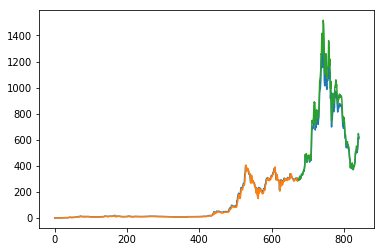

In [23]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(train_predict)+1, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict):len(dataset)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()